<a href="https://colab.research.google.com/github/codeantik/Fraud-Detection-Mega-Case-Study/blob/main/Mega_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Self Organizing Map

##Install MiniSom Package

In [1]:
!pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

##Training the SOM


In [5]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [6]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

## Visualizing the results

In [7]:
from pylab import bone, pcolor, colorbar, plot, show

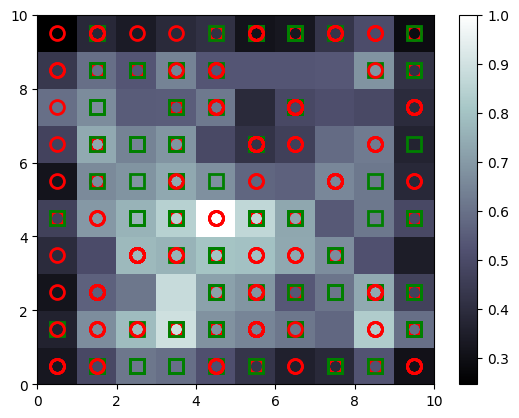

In [8]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5, 
       w[1] + 0.5,
       markers[y[i]], 
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

## Finding the frauds


In [9]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(4, 2)], mappings[(6, 4)], mappings[(3, 8)], mappings[(4, 8)], mappings[(4, 9)]), axis = 0)

##Printing the Fraunch Clients

In [10]:
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5631685e+07 1.0000000e+00 2.3170000e+01 0.0000000e+00 2.0000000e+00
  1.3000000e+01 4.0000000e+00 8.5000000e-02 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5753591e+07 1.0000000e+00 2.6750000e+01 1.1250000e+00 2.0000000e+00
  1.4000000e+01 8.0000000e+00 1.2500000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 5.2990000e+03]
 [1.5797246e+07 1.0000000e+00 2.3420000e+01 5.8500000e-01 2.0000000e+00
  8.0000000e+00 8.0000000e+00 8.5000000e-02 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.8000000e+02 1.0000000e+00]
 [1.5571081e+07 1.0000000e+00 2.2670000e+01 1.0500000e+01 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.3350000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.0000000e+02 1.0000000e+00]
 [1.5751167e+07 1.0000000e+00 4.1330000e+01 0.0000000e+00 2.0000000e+00
  8.0000000e+00 5.0000000e+00 1.5000000e+01 1.0000000e+00 0.

# Going from Unsupervised to Supervised

### creating the matrix of features

In [11]:
customers = dataset.iloc[:, 1:].values

In [12]:
print(customers)

[[1.000e+00 2.208e+01 1.146e+01 ... 1.000e+02 1.213e+03 0.000e+00]
 [0.000e+00 2.267e+01 7.000e+00 ... 1.600e+02 1.000e+00 0.000e+00]
 [0.000e+00 2.958e+01 1.750e+00 ... 2.800e+02 1.000e+00 0.000e+00]
 ...
 [0.000e+00 1.883e+01 9.540e+00 ... 1.000e+02 1.000e+00 1.000e+00]
 [0.000e+00 2.742e+01 1.450e+01 ... 1.200e+02 1.200e+01 1.000e+00]
 [1.000e+00 4.100e+01 4.000e-02 ... 5.600e+02 1.000e+00 1.000e+00]]


### creating the dependent variable

In [13]:
is_fraud = np.zeros(len(dataset))

In [14]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [15]:
for i in range(len(dataset)):
  if dataset.iloc[i, 0] in frauds:
    is_fraud[i] = 1

In [16]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

### feature scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

## Building the ANN

In [18]:
import tensorflow as tf
tf.__version__

'2.12.0'

## Initializing the ANN

In [19]:
ann = tf.keras.models.Sequential()

##Adding the input layer and the first hidden layer

In [20]:
ann.add(tf.keras.layers.Dense(units=2, activation='relu'))

## Adding the output layer

In [21]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

## Compiling the ANN

In [22]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training the ANN on the Training set

In [23]:
ann.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2
690/690 [==============================] - 2s 2ms/step - loss: 0.4996 - accuracy: 0.8043
Epoch 2/2
690/690 [==============================] - 2s 3ms/step - loss: 0.3303 - accuracy: 0.9217


## Predicting test set results

In [24]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:, 1].argsort()]

22/22 [==============================] - 0s 2ms/step


In [25]:
print(y_pred)

[[1.57901130e+07 1.27550459e-06]
 [1.56214230e+07 1.02702106e-05]
 [1.56058720e+07 3.58471851e-04]
 ...
 [1.57938960e+07 5.15780151e-01]
 [1.57112990e+07 5.42734504e-01]
 [1.56847220e+07 5.66669822e-01]]
